### Import Library 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import optimizers, regularizers
import matplotlib.pyplot as plt
import random
import os

### Dataset Exploration

In [2]:
base_dir = os.path.join("D:/Dataset/dataset2output/")

# Train set
train_dir = os.path.join(base_dir + "Train")
print("Train set --> ", os.listdir(train_dir))

# Test set
test_dir = os.path.join(base_dir + "Test")
print("Test set --> ", os.listdir(test_dir))

Train set -->  ['padat', 'senggang']
Test set -->  ['padat', 'senggang']


### CNN Model

In [3]:

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                        

### Model & Callback Function

In [4]:
opt=RMSprop(learning_rate=0.001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.95):
            print("\nReached >90% accuracy so cancelling training!")
            self.model.stop_training = True
        
callbacks = myCallback()

### Training with Image Augmentation

In [5]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2, # Shifting image width by 20%
      height_shift_range=0.2,# Shifting image height by 20%
      shear_range=0.2,       # Shearing across X-axis by 20%
      zoom_range=0.2,        # Image zooming by 20%
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 32
)

Found 574 images belonging to 2 classes.


In [6]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 32
)

Found 82 images belonging to 2 classes.


### Fitting the model

In [7]:
batch_size = 32
history = model.fit(
      train_generator,
      batch_size = 32,
      epochs = 100,
      steps_per_epoch=train_generator.samples//batch_size,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//batch_size,
      callbacks=[callbacks],
      verbose = 1)

Epoch 1/100
17/17 [==============================] - 47s 3s/step - loss: 65.0641 - accuracy: 0.5111 - val_loss: 2.5433 - val_accuracy: 0.5156
Epoch 2/100
17/17 [==============================] - 66s 4s/step - loss: 3.6926 - accuracy: 0.5554 - val_loss: 2.1825 - val_accuracy: 0.5156
Epoch 3/100
17/17 [==============================] - 65s 4s/step - loss: 2.1498 - accuracy: 0.6439 - val_loss: 1.7583 - val_accuracy: 0.5938
Epoch 4/100
17/17 [==============================] - 72s 4s/step - loss: 1.6061 - accuracy: 0.6697 - val_loss: 1.4305 - val_accuracy: 0.5469
Epoch 5/100
17/17 [==============================] - 71s 4s/step - loss: 1.3789 - accuracy: 0.6661 - val_loss: 1.2149 - val_accuracy: 0.5938
Epoch 6/100
17/17 [==============================] - 72s 4s/step - loss: 1.0314 - accuracy: 0.7390 - val_loss: 1.1072 - val_accuracy: 0.5156
Epoch 7/100
17/17 [==============================] - 71s 4s/step - loss: 1.2398 - accuracy: 0.6882 - val_loss: 1.1032 - val_accuracy: 0.4219
Epoch 8/100


Epoch 59/100
17/17 [==============================] - 75s 4s/step - loss: 0.2753 - accuracy: 0.9428 - val_loss: 1.2287 - val_accuracy: 0.6562
Epoch 60/100
17/17 [==============================] - 75s 4s/step - loss: 0.3262 - accuracy: 0.9188 - val_loss: 1.0348 - val_accuracy: 0.6562
Epoch 61/100
17/17 [==============================] - 75s 4s/step - loss: 0.3355 - accuracy: 0.9299 - val_loss: 0.9842 - val_accuracy: 0.6719
Epoch 62/100
17/17 [==============================] - 75s 4s/step - loss: 0.2737 - accuracy: 0.9373 - val_loss: 2.4198 - val_accuracy: 0.6250
Epoch 63/100
17/17 [==============================] - 75s 4s/step - loss: 0.2411 - accuracy: 0.9502 - val_loss: 1.5071 - val_accuracy: 0.6562
Epoch 64/100
17/17 [==============================] - 74s 4s/step - loss: 0.4471 - accuracy: 0.9077 - val_loss: 1.5366 - val_accuracy: 0.5625
Epoch 65/100
17/17 [==============================] - 73s 4s/step - loss: 0.2382 - accuracy: 0.9631 - val_loss: 1.4035 - val_accuracy: 0.6719
Epoch 

### Loss and Accuracy Test

In [10]:
test_loss, test_accuracy = model.evaluate(validation_generator, verbose=1)
print('Loss : ', test_loss)
print('Accuracy :', test_accuracy)

3/3 [==============================] - 1s 232ms/step - loss: 1.0805 - accuracy: 0.6707
Loss :  1.0804786682128906
Accuracy : 0.6707317233085632


### Plot training and validation accuracy and loss

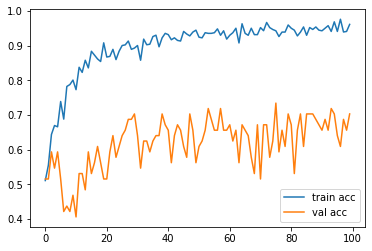

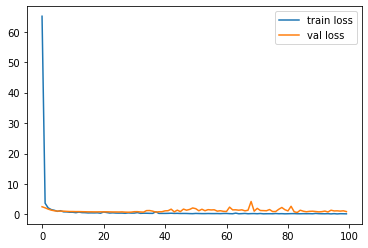

In [9]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

### Predict Test

In [17]:
test_image=image.load_img(r'D:\Dataset\test\senggang\bb.jpg', target_size=(150,150))
test_image=np.expand_dims(test_image, axis=0)

result=model.predict(test_image)

if result[0][0] == 1:
    print("Senggang")
elif result[0][2] == 1:
    print("Padat")

Senggang


### Convert to tflite

In [18]:
# we will train 
import tensorflow as tf
import pathlib

# Construct a basic TF model.
root = tf.train.Checkpoint()
root.v1 = tf.Variable(3.)
root.v2 = tf.Variable(2.)
root.f = tf.function(lambda x: root.v1 * root.v2 * x)

# Save the model into temp directory
export_dir = "D:/Dataset/hasil/out2-RM-categorical-067-1080"
input_data = tf.constant(1., shape=[1, 1])
to_save = root.f.get_concrete_function(input_data)
tf.saved_model.save(root, export_dir, to_save)
# Convert the model into TF Lite.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
#save model 
tflite_model_files = pathlib.Path('D:/Dataset/hasil/out2-RM-categorical-067-1080/save_model_tflite2.tflite')
tflite_model_files.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: D:/Dataset/hasil/out2-RM-categorical-067-1080\assets


716